# <font color='blue'>Telecom Churn Case Study</font>
* Institution: IIIT, Bangalore and UpGrad
* Course: PG Diploma in Machine Lerning and AI March 2018
* Date: 14-Aug-2018
* Submitted by:
    1. Pandinath Siddineni (ID- APFE187000194)
    2. AKNR Chandra Sekhar (ID- APFE187000315)
    3. Brajesh Kumar       (ID- APFE187000149)
    4. Shweta Tiwari
-----------------------------------

# <font color='blue'>PART 3: FEATURE REDUCTION USING PCA</font>

In [1]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Load clean telecom data file
master_df = pd.read_csv('telecom_churn_data_clean.csv', low_memory=False)

In [4]:
master_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
0,7000701601,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0.00,0.00,0.00,1,3.00,6.00,5.00
1,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,...,1,0,1,0.00,354.00,207.00,0,5.00,0.00,1.00
2,7002124215,514.45,597.75,637.76,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0.00,0.00,0.00,0,0.00,0.00,0.00
3,7000887461,74.35,193.90,366.97,48.96,50.66,33.58,85.41,89.36,205.89,...,1,0,1,0.00,712.00,540.00,0,12.00,24.00,7.00
4,7000149764,977.02,2362.83,409.23,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,1,5285.00,20424.00,455.00,0,0.00,1.00,5.00


In [5]:
#list(master_df)

In [6]:
master_df.shape

(28504, 144)

In [8]:
#dropping mobile number
telecom=master_df.drop(['mobile_number'],axis=1)

In [9]:
#extracting all feature vector
feature=telecom.drop(['churn'],axis=1)

## Create X, y variables

In [10]:
X = telecom.drop(['churn'],axis=1)
y = telecom['churn']

In [11]:
X.shape

(28504, 142)

## Applying standard scale

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)

X = scaler.transform(X)

## Lasso

In [13]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.02, penalty="l1", dual=False).fit(X,y)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X)
pos = model.get_support(indices=True)
 
print(X_lasso.shape)
print(pos)

(28504, 86)
[  0   1   3   8   9  10  11  12  13  14  15  18  22  24  25  26  34  37
  38  39  40  41  45  47  48  49  50  52  53  57  58  59  60  64  65  66
  67  68  70  77  78  79  80  81  82  83  84  85  87  88  89  91  92  93
  95  97  98 100 101 102 103 104 106 107 108 109 110 111 112 113 115 116
 117 118 120 121 125 129 132 134 135 136 138 139 140 141]


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [15]:
#feature vector for decision tree
feature.columns[pos]

Index(['arpu_6', 'arpu_7', 'onnet_mou_6', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_7',
 

# applying smote to balance the data set

In [16]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_lasso,y)
print(X_tr.shape)
print(y_tr.shape)
np.count_nonzero(y_tr)

(53816, 86)
(53816,)


26908

## Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tr,y_tr, train_size=0.7,random_state=42)


C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
print(X_train.shape)
print (y_train.shape)
print(X_test.shape)

(37671, 86)
(37671,)
(16145, 86)


In [19]:
print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))
      

Feature space holds 28504 observations and 142 features
Unique target labels: [0 1]


# applying decision tree with default hyperparameter

In [20]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

#print(y_pred_default)
#print(y_test)


             precision    recall  f1-score   support

          0       0.89      0.88      0.89      8096
          1       0.88      0.89      0.89      8049

avg / total       0.89      0.89      0.89     16145



In [22]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[7128  968]
 [ 881 7168]]
0.8854753793744193


# Tuning max_depth

In [23]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [24]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.21,0.01,0.80,0.80,1,{'max_depth': 1},39,0.80,0.80,0.80,...,0.80,0.80,0.81,0.80,0.80,0.80,0.01,0.01,0.00,0.00
1,0.40,0.01,0.83,0.83,2,{'max_depth': 2},38,0.83,0.83,0.83,...,0.84,0.83,0.83,0.83,0.83,0.83,0.01,0.01,0.00,0.00
2,0.61,0.00,0.84,0.84,3,{'max_depth': 3},37,0.84,0.84,0.84,...,0.84,0.84,0.84,0.84,0.84,0.84,0.02,0.00,0.00,0.00
3,0.76,0.01,0.87,0.88,4,{'max_depth': 4},36,0.87,0.88,0.87,...,0.87,0.87,0.87,0.87,0.88,0.88,0.01,0.01,0.00,0.00
4,0.93,0.00,0.89,0.89,5,{'max_depth': 5},35,0.88,0.89,0.89,...,0.89,0.89,0.89,0.89,0.89,0.89,0.04,0.00,0.00,0.00


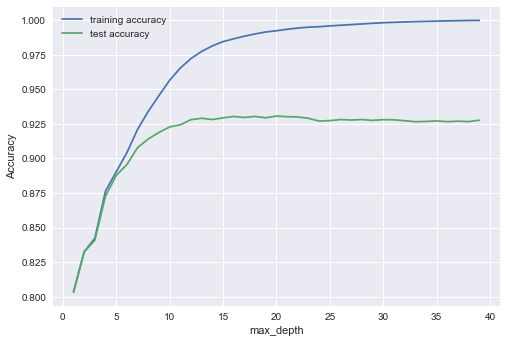

In [25]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


conclusion for max depth:
You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 10, after which the test score is constant. Note that the scores are average accuracies across the 5-folds.

we can consider max_depth=10

# Tuning min_samples_leaf

In [26]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [27]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_leaf,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,2.69,0.00,0.93,0.97,5,{'min_samples_leaf': 5},1,0.92,0.97,0.92,...,0.93,0.97,0.92,0.97,0.93,0.97,0.15,0.00,0.00,0.00
1,2.14,0.01,0.91,0.93,25,{'min_samples_leaf': 25},2,0.91,0.94,0.91,...,0.91,0.93,0.91,0.93,0.91,0.94,0.09,0.01,0.00,0.00
2,1.93,0.01,0.91,0.92,45,{'min_samples_leaf': 45},3,0.91,0.92,0.90,...,0.91,0.92,0.90,0.92,0.91,0.92,0.11,0.01,0.00,0.00
3,1.78,0.01,0.90,0.91,65,{'min_samples_leaf': 65},4,0.91,0.92,0.90,...,0.91,0.92,0.90,0.91,0.91,0.91,0.13,0.01,0.00,0.00
4,1.71,0.01,0.90,0.91,85,{'min_samples_leaf': 85},5,0.90,0.91,0.89,...,0.90,0.91,0.90,0.91,0.90,0.91,0.07,0.01,0.00,0.00


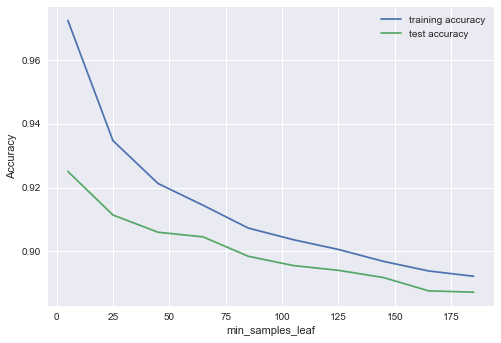

In [28]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


conclusion for min_samples_leaf:
at low values of min_samples_leaf seems overfitted. At values 125,the model becomes more stable and the training and test accuracy start to converge.
min_samples_leaf=125

# Tuning min_samples_split

In [29]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [30]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,3.31,0.00,0.93,1.00,5,{'min_samples_split': 5},1,0.93,1.00,0.93,...,0.93,0.99,0.92,1.00,0.93,1.00,0.51,0.00,0.00,0.00
1,3.24,0.00,0.92,0.97,25,{'min_samples_split': 25},2,0.92,0.97,0.92,...,0.92,0.97,0.91,0.97,0.92,0.97,0.49,0.01,0.00,0.00
2,3.06,0.00,0.91,0.96,45,{'min_samples_split': 45},3,0.92,0.96,0.92,...,0.92,0.96,0.90,0.96,0.92,0.96,0.31,0.00,0.01,0.00
3,3.08,0.00,0.91,0.95,65,{'min_samples_split': 65},4,0.92,0.95,0.91,...,0.92,0.95,0.90,0.95,0.91,0.95,0.25,0.00,0.01,0.00
4,3.01,0.00,0.91,0.94,85,{'min_samples_split': 85},5,0.91,0.95,0.91,...,0.91,0.94,0.90,0.94,0.91,0.95,0.28,0.00,0.00,0.00


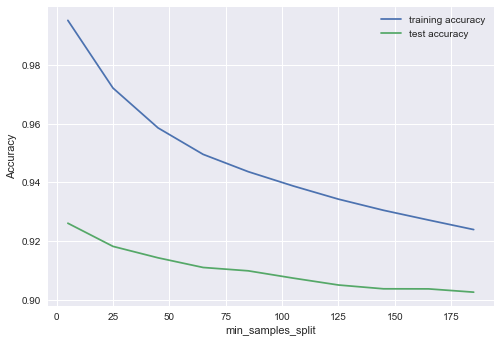

In [31]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

as increase min_samples_split, the tree overfits lesser since the model is less complex

In [32]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [33]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.32,0.00,0.88,0.88,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",13,...,0.88,0.88,0.87,0.88,0.89,0.88,0.02,0.01,0.00,0.00
1,1.33,0.00,0.88,0.88,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",13,...,0.88,0.88,0.87,0.88,0.89,0.88,0.04,0.01,0.00,0.00
2,1.30,0.00,0.88,0.88,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",15,...,0.88,0.88,0.87,0.88,0.88,0.88,0.01,0.00,0.00,0.00
3,1.30,0.00,0.88,0.88,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",15,...,0.88,0.88,0.87,0.88,0.88,0.88,0.01,0.00,0.00,0.00
4,2.34,0.00,0.91,0.92,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",2,...,0.91,0.92,0.91,0.92,0.91,0.92,0.33,0.01,0.00,0.00
5,2.55,0.02,0.91,0.92,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",1,...,0.91,0.92,0.91,0.92,0.91,0.92,0.60,0.01,0.00,0.00
6,1.95,0.01,0.90,0.91,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",5,...,0.90,0.91,0.89,0.91,0.90,0.91,0.02,0.01,0.00,0.00
7,1.95,0.00,0.90,0.91,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",5,...,0.90,0.91,0.89,0.91,0.90,0.91,0.02,0.01,0.00,0.00
8,0.88,0.00,0.89,0.89,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",9,...,0.89,0.89,0.89,0.89,0.89,0.89,0.01,0.01,0.00,0.00
9,0.88,0.00,0.89,0.89,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",9,...,0.89,0.89,0.89,0.89,0.89,0.89,0.01,0.01,0.00,0.00


In [35]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9082317963420138
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [36]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [37]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9078971817900279